# Data Analysis and Visualization with Pandas and Matplotlib

This notebook demonstrates how to use the Pandas library for data analysis and Matplotlib for data visualization in Python.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load a sample dataset using pandas
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Basic data analysis with pandas
print('DataFrame Info:')
df.info()
print('\nSummary Statistics:')
print(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      

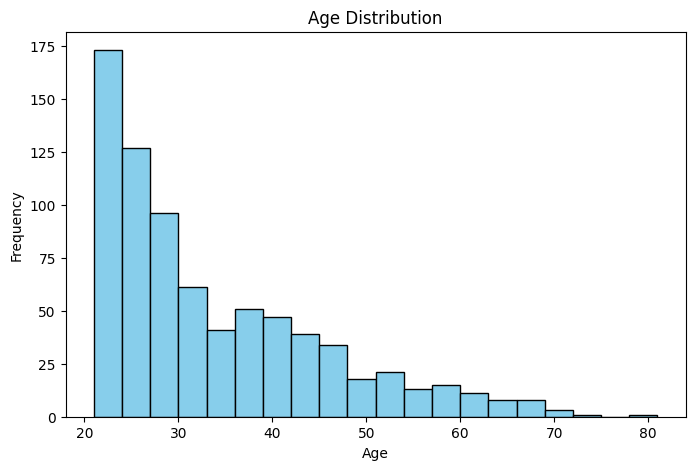

In [4]:
# Data visualization with matplotlib
if 'Age' in df.columns:
    plt.figure(figsize=(8,5))
    plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print('No Age column found in the dataset.')

## Advanced Data Analysis and Visualization

We will now perform deeper data analysis, including handling missing values, correlation analysis, groupby operations, and multiple types of visualizations.

In [5]:
# Handling missing values
print('Missing values in each column:')
print(df.isnull().sum())

# Fill missing values with column mean (if any)
df_filled = df.fillna(df.mean(numeric_only=True))
print('\nAny missing values left?')
print(df_filled.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Any missing values left?
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


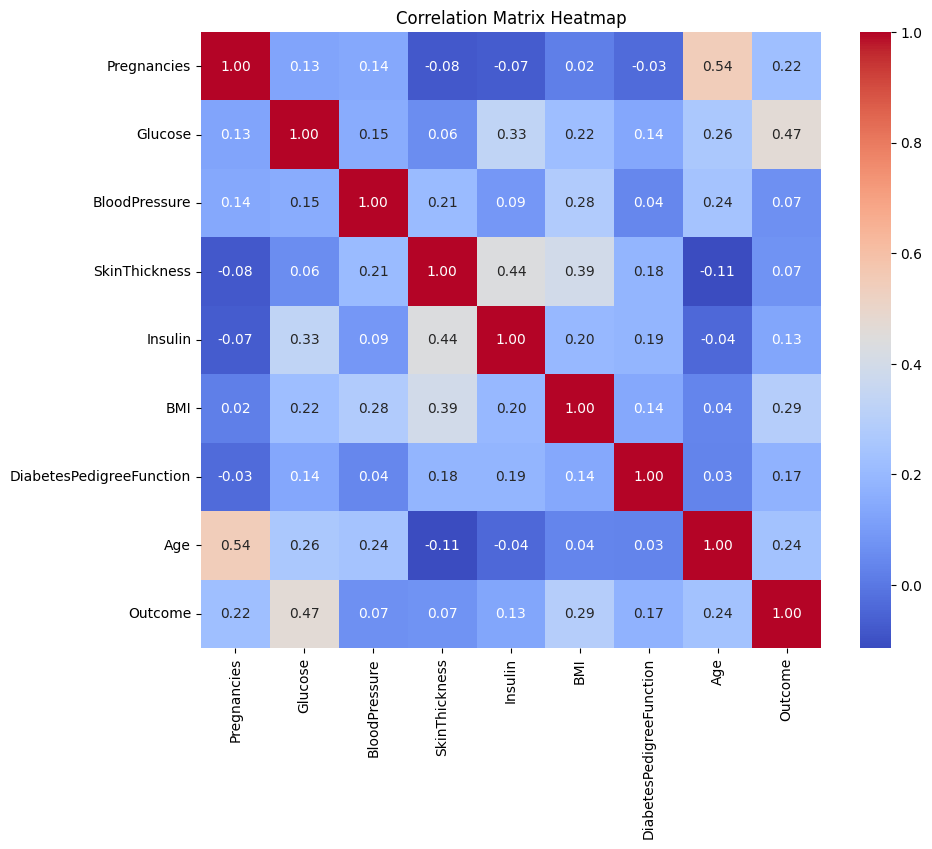

In [6]:
# Correlation analysis and heatmap visualization
import seaborn as sns

plt.figure(figsize=(10,8))
corr = df_filled.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


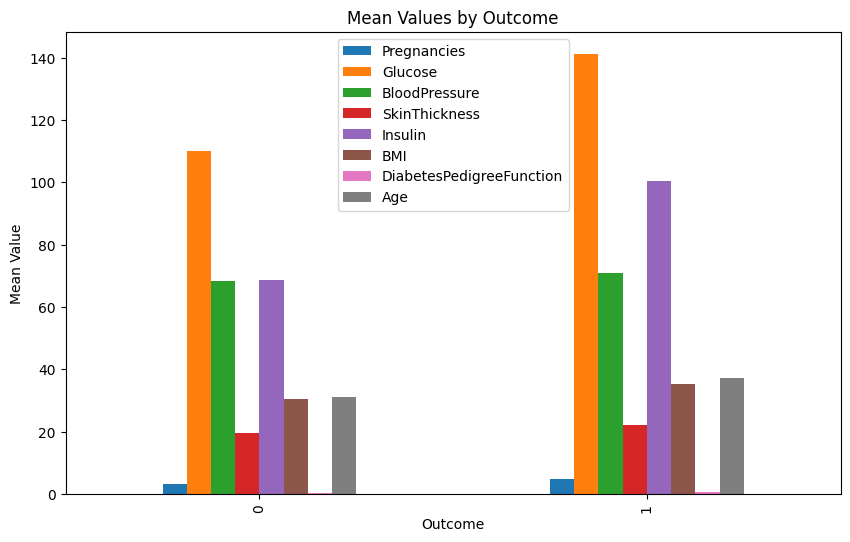

In [7]:
# Groupby analysis and bar plot visualization

# Example: Mean of all columns grouped by 'Outcome' if present
if 'Outcome' in df_filled.columns:
    group_means = df_filled.groupby('Outcome').mean(numeric_only=True)
    print(group_means)
    group_means.plot(kind='bar', figsize=(10,6))
    plt.title('Mean Values by Outcome')
    plt.ylabel('Mean Value')
    plt.xlabel('Outcome')
    plt.legend(loc='best')
    plt.show()
else:
    print('No Outcome column found for groupby analysis.')

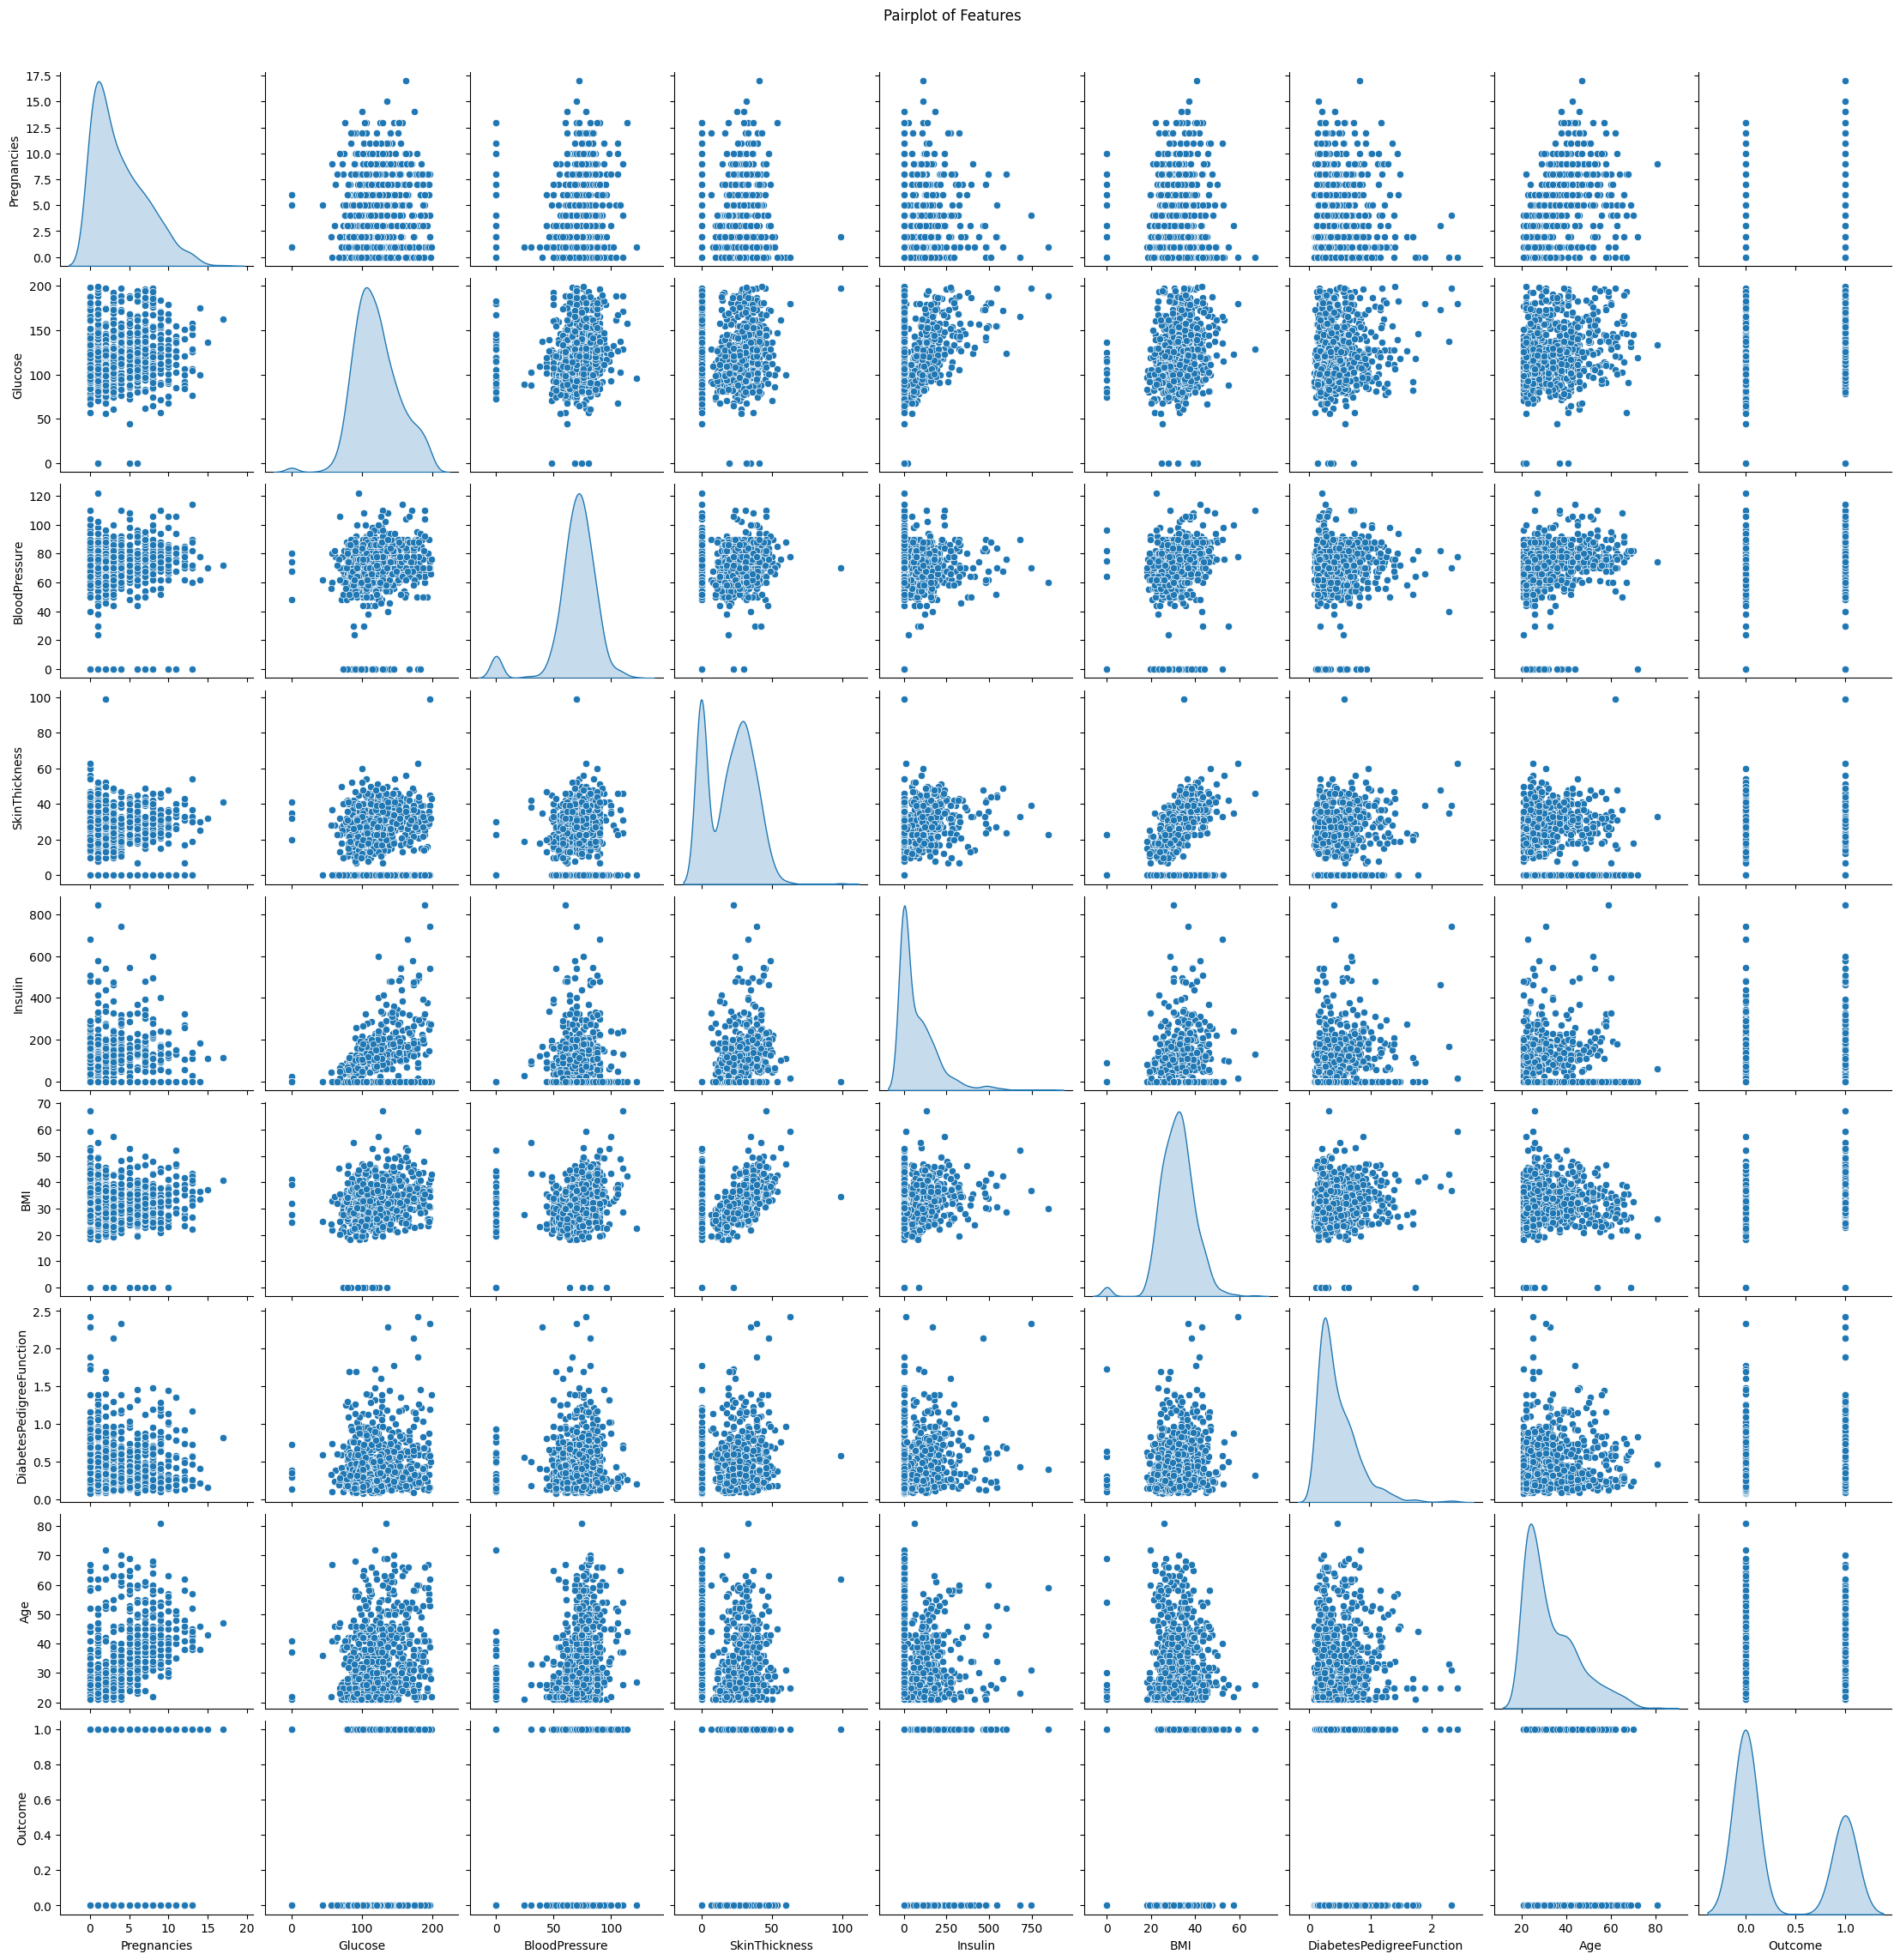

In [8]:
# Pairplot visualization for deeper exploration
if df_filled.shape[1] <= 10:  # Limit to avoid too many plots
    sns.pairplot(df_filled, diag_kind='kde')
    plt.suptitle('Pairplot of Features', y=1.02)
    plt.show()
else:
    print('Too many columns for pairplot. Consider selecting a subset of columns.')